In [1]:
import canny

In [2]:
import canny

In [3]:
import canny

In [4]:
import canny

Applying mean filter with zero padding on waldo.png


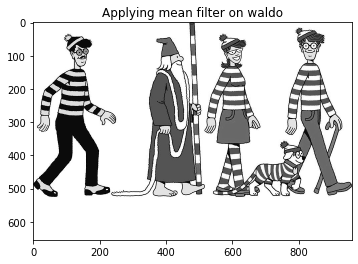

Applying filter on 3d rgb waldo.png


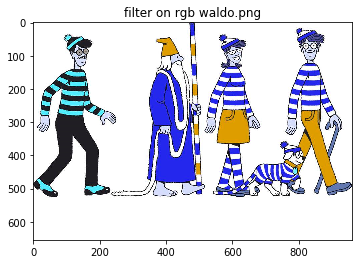

Applying gaussian filter with sigma = 1 on waldo.png


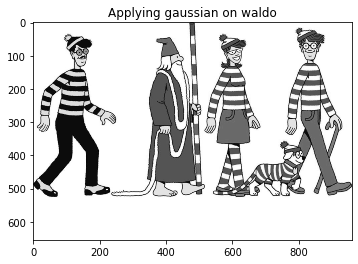

Gradient and direction for waldo
(array([[255.       , 240.4163056, 240.4163056, ..., 240.4163056,
        240.4163056, 255.       ],
       [240.4163056,   0.       ,   0.       , ...,   0.       ,
          0.       , 240.4163056],
       [240.4163056,   0.       ,   0.       , ...,   0.       ,
          0.       , 240.4163056],
       ...,
       [240.4163056,   0.       ,   0.       , ...,   0.       ,
          0.       , 240.4163056],
       [240.4163056,   0.       ,   0.       , ...,   0.       ,
          0.       , 240.4163056],
       [255.       , 240.4163056, 240.4163056, ..., 240.4163056,
        240.4163056, 255.       ]]), array([[135.,  90.,  90., ...,  90.,  90.,  45.],
       [180., 180., 180., ..., 180., 180., 360.],
       [180., 180., 180., ..., 180., 180., 360.],
       ...,
       [180., 180., 180., ..., 180., 180., 360.],
       [180., 180., 180., ..., 180., 180., 360.],
       [225., 270., 270., ..., 270., 270., 315.]]))
Gradient and direction for template
(a

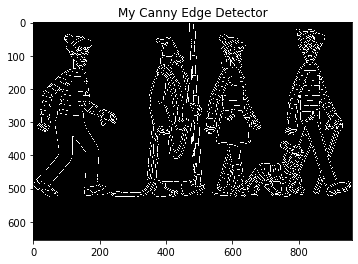

0.6003865651237403


C:\Users\DELL-PC\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import measure
import math

def compareimagessim(imageA, imageB):
    s = measure.compare_ssim(imageA, imageB)
    return s

def greyscaleconvolution(img, filt):
    
    if len(img.shape)==3 :
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    
    kernel_row, kernel_col = filt.shape
    img_row, img_col = img.shape
    out0 = np.zeros(img.shape)
    

    output = np.zeros(img.shape)

    pad_ht = int((kernel_row - 1) / 2)
    pad_wth = int((kernel_col - 1) / 2)
    padded_img = np.zeros((img_row + (2*pad_ht), img_col + (2 * pad_wth)))

    padded_img[pad_ht:padded_img.shape[0] - pad_ht, pad_wth:padded_img.shape[1] - pad_wth] = img  
 
    for row in range(img_row):
        for col in range(img_col):
            output[row, col] = np.sum(filt * padded_img[row:row + kernel_row, col:col + kernel_col])            
            output[row, col] /= filt.shape[0] * filt.shape[1] 
            
    return output
            
            
def threeDconvolution(img, filt):
    
#   a=np.empty((2,3,5))
    kernel_row, kernel_col = filt.shape
    img_row, img_col, channels = img.shape
    output = np.zeros(img.shape)
    pad_ht = int((kernel_row - 1) / 2)
    pad_wth = int((kernel_col - 1) / 2)
    
#  img[:, :, i] = greyscaleconvolution(img[:, :, i] , filt)
    
    for i in range(3):        
        padded_img = np.zeros((img_row + (2*pad_ht), img_col + (2 * pad_wth)))
        padded_img[pad_ht:padded_img.shape[0] - pad_ht, pad_wth:padded_img.shape[1] - pad_wth] = img[:, :, i] 
        for row in range(img_row):
            for col in range(img_col):
                output[row, col, i] = np.sum(filt * padded_img[row:row + kernel_row, col:col + kernel_col])            
                output[row, col, i] /= filt.shape[0] * filt.shape[1] 
        
    return img    
    
    
            
     
#   plt.imshow(output, cmap='gray')

#   plt.show()

    return output


def gaussian(n, sig=1):
    n = int(n) // 2
    
    a , b = np.mgrid[-n: n+1 , -n : n+1]
    denominator = 1 / (2.0 * np.pi*(sig**2))
    filter = np.exp(-(a**2 + b**2)/(2.0*sig**2)) * denominator
    return filter	

def gaussianblur(image, n):
    filter = gaussian(n, sig=math.sqrt(n))
    return greyscaleconvolution(image, filter)
	
	

def sobelGradient(image, filter):

    convolvedImgX = greyscaleconvolution(image, filter)
    convolvedImgY = greyscaleconvolution(image, np.flip(filter.T, axis=0))
    conv = np.zeros(image.shape)
    gradientMag = np.sqrt(np.square(convolvedImgX) + np.square(convolvedImgY) )
    gradientMag *= 255.0/ gradientMag.max()
    gradientDirection = np.arctan2(convolvedImgY, convolvedImgX)
    gradDir1 = np.ones(image.shape)
    gradientDirection = np.rad2deg(gradientDirection)
    gradientDirection +=180
    return gradientMag, gradientDirection


def NonMaxSuppression(gradientMag, gradientDirection):
	imgRow,imgCol = gradientMag.shape
	op = np.zeros(gradientMag.shape)
	PY = 180
	for row in range(1, imgRow-1):
		for col in range(1, imgCol-1):
			dir = gradientDirection[ row, col ]
			
			if (0 <= dir < PY/ 8) or (15*PY/8 <= dir <= 2*PY):
				former = gradientMag[row,col-1]
				later = gradientMag[row, col+1]
			
			elif (PY/8 <= dir < 3*PY/ 8) or (9*PY/8 <= dir < 11*PY/8):
				former = gradientMag[row+1,col-1]
				later = gradientMag[row-1, col+1]
			
			elif (3*PY/8 <= dir < 5*PY/ 8) or (11*PY/8 <= dir < 13*PY/8):
				former = gradientMag[row-1,col]
				later = gradientMag[row+1, col]
			
			else:
				former = gradientMag[row-1,col-1]
				later = gradientMag[row+1, col+1]
			
			if gradientMag[row,col] >= former and gradientMag[row,col] >= later:
				op[row,col] = gradientMag[row,col]
	return op            
                


def hysteresisthreshold(img, low, high, weak):
    op = np.zeros(img.shape)
    stng = 255
    stngrow, stngcol = np.where(img >= high)
    wkrow, wkcol = np.where((img <= high) & (img >= low))
    output1 = np.zeros(img.shape)
    op[stngrow, stngcol] = stng
    op[wkrow, wkcol] = weak    
    return op


def hysteresis(img, weak):
	imgrow, imgcol = img.shape
	
	output1 = np.zeros(img.shape)
	uptodown = img.copy()
	
	for row in range(1, imgrow):
		for col in range(1, imgcol):
			if uptodown[row, col]== weak:
				if uptodown[row, col+1] == 255 or uptodown[row, col-1]==255 or uptodown[row-1, col]== 255 or uptodown[row+1, col]== 255 or uptodown[row-1, col-1]== 255 or uptodown[row+1,col-1]== 255 or uptodown[row-1, col+1]== 255 or uptodown[row+1, col+1]== 255:
					uptodown[row,col] = 255
				
				else:
					uptodown[row,col] = 0
	
	downtoup = img.copy()
	
	for row in range(imgrow-1, 0, -1):
		for col in range(imgcol -1, 0, -1):
			if downtoup[row, col]== weak:
				if downtoup[row, col+1] == 255 or downtoup[row, col-1]==255 or downtoup[row-1, col]== 255 or downtoup[row+1, col]== 255 or downtoup[row-1, col-1]== 255 or downtoup[row+1,col-1]== 255 or downtoup[row-1, col+1]== 255 or downtoup[row+1, col+1]== 255:
					downtoup[row,col] = 255
				
				else:
					downtoup[row,col] = 0
					
	
	lefttoright = img.copy()
	
	for row in range(imgrow-1, 0, -1):
		for col in range(1, imgcol):
			if lefttoright[row, col]== weak:
				if lefttoright[row, col+1] == 255 or lefttoright[row, col-1]==255 or lefttoright[row-1, col]== 255 or lefttoright[row+1, col]== 255 or lefttoright[row-1, col-1]== 255 or lefttoright[row+1,col-1]== 255 or lefttoright[row-1, col+1]== 255 or lefttoright[row+1, col+1]== 255:
					lefttoright[row,col] = 255
				
				else:
					lefttoright[row,col] = 0
					

	righttoleft = img.copy()
	
	for row in range(1, imgrow):
		for col in range(imgcol-1, 0, -1):
			if righttoleft[row, col]== weak:
				if righttoleft[row, col+1] == 255 or righttoleft[row, col-1]==255 or righttoleft[row-1, col]== 255 or righttoleft[row+1, col]== 255 or righttoleft[row-1, col-1]== 255 or righttoleft[row+1,col-1]== 255 or righttoleft[row-1, col+1]== 255 or righttoleft[row+1, col+1]== 255:
					righttoleft[row,col] = 255
				
				else:
					righttoleft[row,col] = 0
						
	processedimg = uptodown + downtoup + lefttoright + righttoleft
	processedimg[processedimg > 255] = 255
	
	return processedimg

def MyCannyEdgeDetector(image, threshold):   
    #image = cv2.imread("waldo.png")  
    image2 = gaussianblur(image,5)  
    sobelfilter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    gradientMag, gradientDirection = sobelGradient(image2, sobelfilter)
    image1 = NonMaxSuppression(gradientMag, gradientDirection)
    image1 = hysteresisthreshold(image1, 4 , 24 , 52)
    image1 = hysteresis(image1, 52)
    plt.imshow(image1, cmap='gray')  
    plt.title("My Canny Edge Detector")
    plt.show()    
    print(compareimagessim(cv2.Canny(image,4,24) , image1) )
    #print("waldo.png")
    
image1 = cv2.imread("waldo.png")
sobelfilter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
meanfilter = np.array([[1,1,1],[1,1,1],[1,1,1]])

print("Applying mean filter with zero padding on waldo.png")
aftermean = greyscaleconvolution(image1, meanfilter)
plt.imshow(aftermean , cmap='gray')  
plt.title("Applying mean filter on waldo")
plt.show() 

print("Applying filter on 3d rgb waldo.png")
rgbimg = threeDconvolution(image1, meanfilter)
plt.imshow(rgbimg)  
plt.title("filter on rgb waldo.png")
plt.show() 


print("Applying gaussian filter with sigma = 1 on waldo.png")
reqgaussianfilter = gaussian(3,1)
aftergaussianimg = greyscaleconvolution(image1, reqgaussianfilter)
plt.imshow(aftergaussianimg , cmap='gray')  
plt.title("Applying gaussian on waldo")
plt.show()  
    


print("Gradient and direction for waldo") 
print(sobelGradient(image1, sobelfilter))

image2 = cv2.imread("template.png")
print("Gradient and direction for template") 
print(sobelGradient(image2, sobelfilter))

MyCannyEdgeDetector(image1, 50)


